In [1]:
!pip install gdown pandas numpy scikit-learn imbalanced-learn xgboost shap matplotlib seaborn


In [3]:
import gdown

# Google Drive file ID
file_id = "1ya5uRxvqyHcqsJcLtJUwMgOw4_kF6oyp"
output = "creditcard.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ya5uRxvqyHcqsJcLtJUwMgOw4_kF6oyp
From (redirected): https://drive.google.com/uc?id=1ya5uRxvqyHcqsJcLtJUwMgOw4_kF6oyp&confirm=t&uuid=3564d154-bfaf-48d5-b9f4-d01b838fc7eb
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:02<00:00, 75.3MB/s]


'creditcard.csv'

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Display the first few rows
print(data.head())

# Check dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Check class distribution
print(data['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

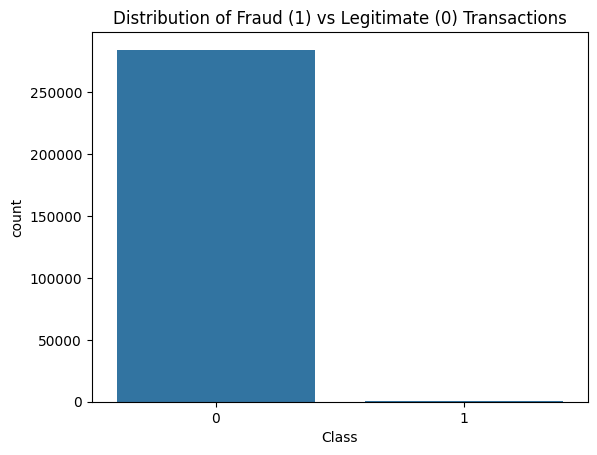

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=data)
plt.title("Distribution of Fraud (1) vs Legitimate (0) Transactions")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop(columns=["Class"])
y = data["Class"]

# Split into training and testing sets (stratify to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training and testing sets created successfully!")


Training and testing sets created successfully!


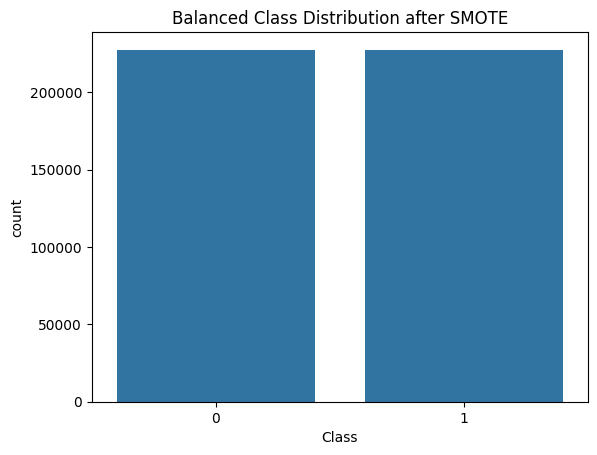

In [8]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution after SMOTE")
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

[[55592  1272]
 [    9    89]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.89      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962



XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.89      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9955057757803448


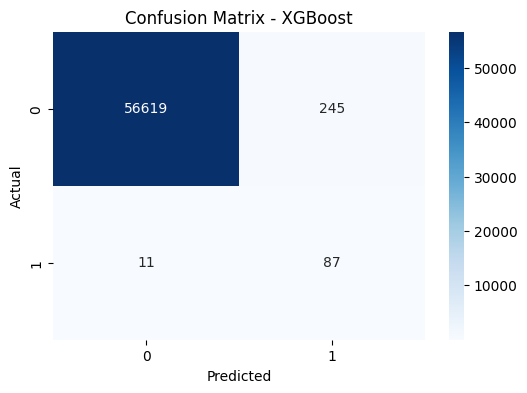

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print evaluation metrics
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


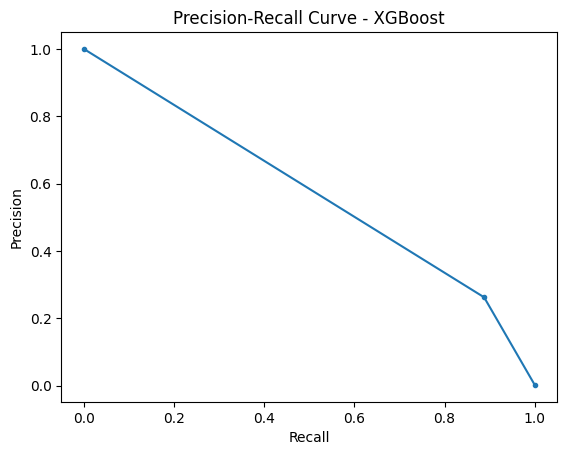

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.show()


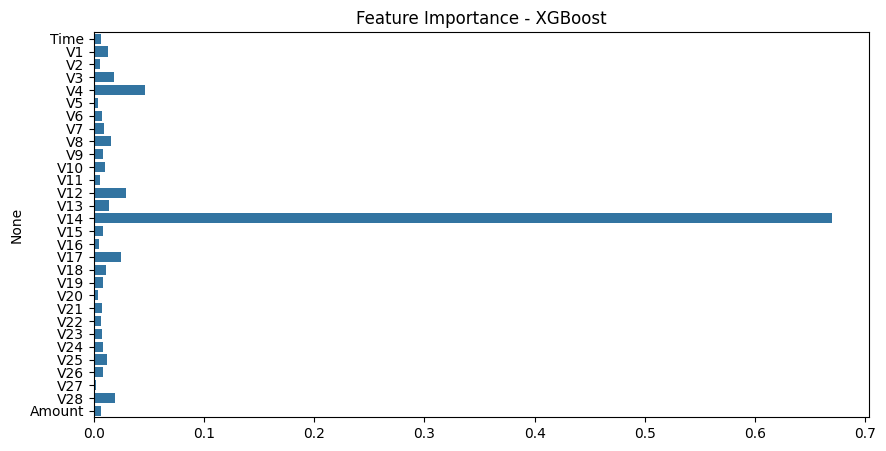

In [15]:
importances = xgb.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - XGBoost")
plt.show()


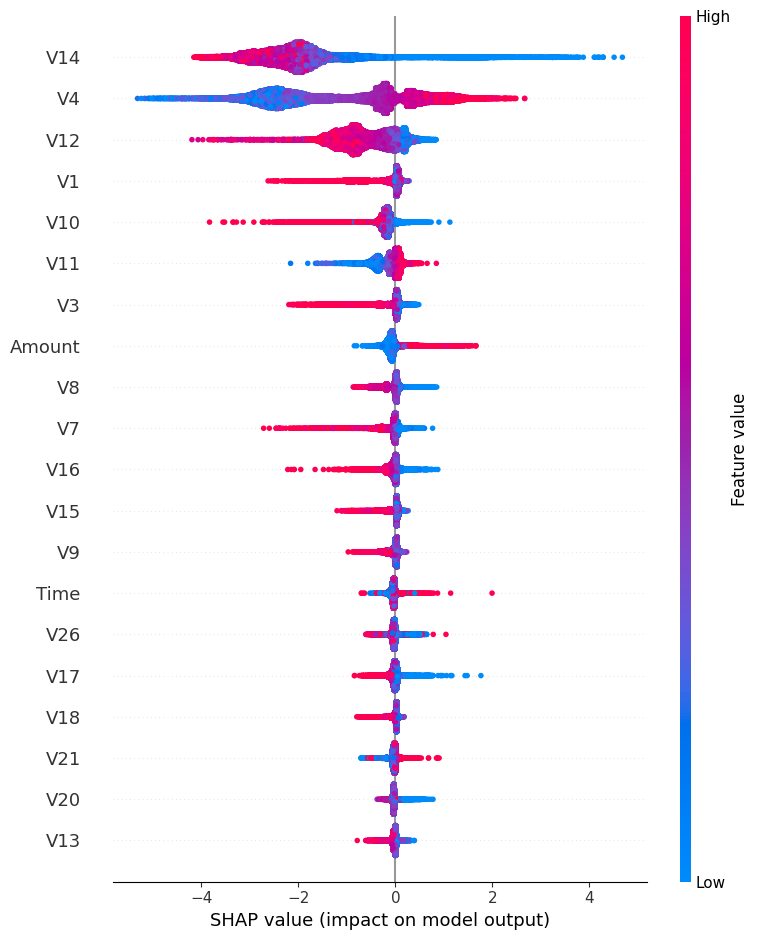

In [16]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [17]:
import joblib

# Save the trained model
joblib.dump(xgb, "fraud_detection_xgb_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [18]:
# Load the model
xgb_loaded = joblib.load("fraud_detection_xgb_model.pkl")

# Make predictions on new data (example)
new_transaction = X_test.iloc[0:1]  # Take one example transaction
fraud_prediction = xgb_loaded.predict(new_transaction)

print("Fraud Prediction:", fraud_prediction)


Fraud Prediction: [0]


In [19]:
import pandas as pd

# Add predictions to the test set
X_test["Fraud_Prediction"] = y_pred_xgb  # Model predictions
X_test["Actual_Class"] = y_test.values  # True fraud labels

# Save only important columns
dashboard_data = X_test.copy()

# Export dataset
dashboard_data.to_csv("fraud_dashboard_data.csv", index=False)

print("Dashboard dataset saved successfully!")


Dashboard dataset saved successfully!


In [20]:
pip install gdown


In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

# Add predictions to the test set
X_test["Fraud_Prediction"] = y_pred_xgb  # Model's fraud predictions
X_test["Actual_Class"] = y_test.values  # True fraud labels

# Save only important columns for visualization
dashboard_data = X_test.copy()

# Define the Google Drive save path
file_path = "/content/drive/My Drive/fraud_dashboard_data.csv"

# Save dataset to Google Drive
dashboard_data.to_csv(file_path, index=False)

print(f"Dashboard dataset saved successfully in Google Drive: {file_path}")


Dashboard dataset saved successfully in Google Drive: /content/drive/My Drive/fraud_dashboard_data.csv
